![The Harmony Project logo](https://raw.githubusercontent.com/harmonydata/brand/main/Logo/PNG/%D0%BB%D0%BE%D0%B3%D0%BE%20%D1%84%D1%83%D0%BB-05.png)

<a href="https://harmonydata.ac.uk"><span align="left">🌐 harmonydata.ac.uk</span></a>
<a href="https://github.com/harmonydata/harmony"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/github-mark.svg" alt="Harmony Python package | Github" width="21px"/></a>
<a href="https://www.linkedin.com/company/harmonydata"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/linkedin.svg" alt="Harmony | LinkedIn" width="21px"/></a>
<a href="https://twitter.com/harmony_data"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/x.svg" alt="Harmony | X" width="21px"/></a>
<a href="https://www.instagram.com/harmonydata/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/instagram.svg" alt="Harmony | Instagram" width="21px"/></a>
<a href="https://www.facebook.com/people/Harmony-Project/100086772661697/"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/fb.svg" alt="Harmony | Facebook" width="21px"/></a>
<a href="https://www.youtube.com/channel/UCraLlfBr0jXwap41oQ763OQ"><img align="left" src="https://raw.githubusercontent.com//harmonydata/.github/main/profile/yt.svg" alt="Harmony | YouTube" width="21px"/></a>

# Harmony walkthrough - Python library

You can run this notebook in Google Colab: <a href="https://colab.research.google.com/github/harmonydata/harmony/blob/main/Harmony_example_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how you can use Harmony to find the similarity matrix between two questionnaires from Harmony's database, and a third questionnaire which you input here (Norwegian GAD-7).

Harmony is a data harmonisation tool that uses natural language
processing to recognise where questions in questionnaires are semantically similar. Harmony is a collaboration project between [Ulster University](https://ulster.ac.uk/), [University College London](https://ucl.ac.uk/), the [Universidade Federal de Santa Maria](https://www.ufsm.br/), and [Fast Data Science](http://fastdatascience.com/).  Harmony is funded by [Wellcome](https://wellcome.org/) as part of the [Wellcome Data Prize in Mental Health](https://wellcome.org/grant-funding/schemes/wellcome-mental-health-data-prize).

This walkthrough lets you compare items where questions have already been extracted from the PDFs. If you want to process PDFs, you also need to install
Java and [Apache Tika](https://tika.apache.org/) - see the Harmony README.

![my badge](https://badgen.net/badge/Status/In%20Development/orange)

[![PyPI package](https://img.shields.io/badge/pip%20install-harmonydata-brightgreen)](https://pypi.org/project/harmonydata/)


## Install the Harmony Python library from Pypi

In [7]:
!pip install harmonydata

'pip' is not recognized as an internal or external command,
operable program or batch file.


Also install Matplotlib because we would like to do some plots in this demo. But this is not generally needed for Harmony.

In [8]:
!pip install matplotlib

'pip' is not recognized as an internal or external command,
operable program or batch file.


## Import the library and check the version

In [34]:
import harmony

What version of Harmony are we on?

In [35]:
harmony.__version__

'1.0.4'

In [36]:
from harmony import create_instrument_from_list

gad_7_norwegian = create_instrument_from_list(["Følt deg nervøs, engstelig eller veldig stresset",
                   "Ikke klart å slutte å bekymre deg eller kontrolleren bekymringene dine"],
                  instrument_name="GAD-7 Norwegian")

In [37]:
instruments = [harmony.example_instruments["CES_D English"],
               harmony.example_instruments["GAD-7 Portuguese"],
               gad_7_norwegian]

You can provide a list of topics to Harmony to tag the questions with.

In [38]:
match_response = harmony.match_instruments(instruments, topics=[
    "anxiety", "nervous", "difficulty", "scared", "unhappy", "sleep", "eating"
    ])

questions = match_response.questions
similarity = match_response.similarity_with_polarity
response_options_similarity = match_response.response_options_similarity

c:\Users\alexn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


See the questions and topics

In [39]:
for q in questions:
    print (q.question_text)
    print("\t", "Topics:", q.topics)

I was bothered by things that usually don’t bother me.
	 Topics: []
I did not feel like eating; my appetite was poor.
	 Topics: ['eating']
I felt that I could not shake off the blues even with help from my family or friends.
	 Topics: ['difficulty']
I felt I was just as good as other people.
	 Topics: []
I had trouble keeping my mind on what I was doing.
	 Topics: ['difficulty']
I felt depressed.
	 Topics: ['unhappy']
I felt that everything I did was an effort.
	 Topics: []
I felt hopeful about the future.
	 Topics: []
I thought my life had been a failure.
	 Topics: []
I felt fearful.
	 Topics: ['scared']
My sleep was restless.
	 Topics: ['sleep']
I was happy.
	 Topics: []
I talked less than usual.
	 Topics: []
I felt lonely.
	 Topics: []
People were unfriendly.
	 Topics: []
I enjoyed life.
	 Topics: []
I had crying spells.
	 Topics: ['unhappy']
I felt sad.
	 Topics: []
I felt that people dislike me.
	 Topics: ['unhappy']
I could not get “going.”
	 Topics: []
Sentir-se nervoso/a, ansio

See the similarity matrix

In [40]:
similarity

array([[ 1.        ,  0.3136501 ,  0.3432307 , -0.26082839,  0.42788808,
         0.34054828, -0.30748932, -0.18449382, -0.25914561,  0.312328  ,
         0.28057172, -0.2810104 ,  0.4857707 ,  0.27214033, -0.2800039 ,
        -0.19890615,  0.28694491,  0.31094231,  0.37545971,  0.28829143,
         0.33788021,  0.44290323,  0.43870799, -0.26580207,  0.38783197,
         0.53001137,  0.25845858,  0.34834391,  0.47597807],
       [ 0.3136501 ,  1.        ,  0.3253128 , -0.38449691, -0.39382809,
        -0.43607549, -0.44434265, -0.23701808, -0.46996565, -0.3660822 ,
        -0.34493573, -0.29561764,  0.36299873,  0.38550647, -0.20762314,
        -0.30174492, -0.41118515, -0.42717948, -0.33941368,  0.3795192 ,
        -0.31706221,  0.11435867, -0.11078682, -0.19496466, -0.25027668,
        -0.14382351, -0.24803394, -0.29994106, -0.12476516],
       [ 0.3432307 ,  0.3253128 ,  1.        , -0.45727843,  0.36003788,
         0.44618647, -0.42400639, -0.30709133, -0.409099  ,  0.34075582,
  

See the response options similarity matrix

In [41]:
response_options_similarity

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.80901885, 0.80901885, 0.80901885, 0.80901885, 0.80901885,
        0.80901885, 0.80901885, 0.13192245, 0.13192245],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.80901885, 0.80901885, 0.80901885, 0.80901885, 0.80901885,
        0.80901885, 0.80901885, 0.13192245, 0.13192245],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
  

## Plot the similarity matrix

In [17]:
import matplotlib.pyplot as plt

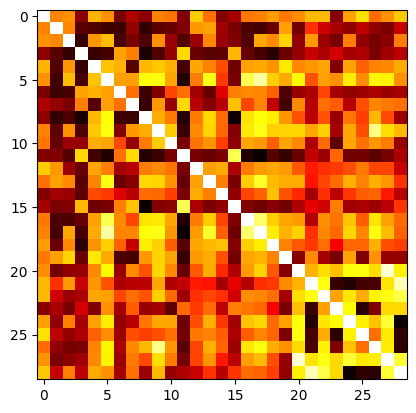

In [18]:
plt.imshow(similarity, cmap='hot', interpolation='nearest')

## Generate a crosswalk table

In [19]:
from harmony.matching.generate_crosswalk_table import generate_crosswalk_table

In [20]:
threshold = 0.6

In [21]:
df_crosswalk_table = generate_crosswalk_table(instruments, similarity, threshold, is_allow_within_instrument_matches = True, is_enforce_one_to_one = True)

In [22]:
df_crosswalk_table

,pair_name,question1_id,question1_text,question2_id,question2_text,match_score
0,GAD-7 Portuguese_1_GAD-7 Norwegian_1,GAD-7 Portuguese_1,"Sentir-se nervoso/a, ansioso/a ou muito tenso/a",GAD-7 Norwegian_1,"Følt deg nervøs, engstelig eller veldig stresset",0.926110
1,GAD-7 Portuguese_2_GAD-7 Norwegian_2,GAD-7 Portuguese_2,Não ser capaz de impedir ou de controlar as pr...,GAD-7 Norwegian_2,Ikke klart å slutte å bekymre deg eller kontro...,0.880754
2,CES_D English_6_CES_D English_18,CES_D English_6,I felt depressed.,CES_D English_18,I felt sad.,0.849690
3,CES_D English_10_GAD-7 Portuguese_7,CES_D English_10,I felt fearful.,GAD-7 Portuguese_7,Sentir medo como se algo horrível fosse acontecer,0.811445
4,CES_D English_12_CES_D English_16,CES_D English_12,I was happy.,CES_D English_16,I enjoyed life.,0.727979


## Cluster the questions

Display the clusters that come out of Harmony by default

In [23]:
for cluster in match_response.clusters:
    print (f"Cluster #{cluster.cluster_id}: {cluster.text_description}")
    print (f"Keywords: {cluster.keywords}")
    for question in cluster.items:
        print ("\t", question.question_text)
    print ("\n")

Cluster #0: I was happy.
Keywords: ['happy', 'enjoyed', 'hopeful']
	 I felt I was just as good as other people.
	 I felt hopeful about the future.
	 I was happy.
	 I enjoyed life.


Cluster #1: I talked less than usual.
Keywords: ['unfriendly', 'usual', 'less']
	 I was bothered by things that usually don’t bother me.
	 I talked less than usual.
	 People were unfriendly.


Cluster #2: I felt sad.
Keywords: ['depressed', 'fearful', 'sad', 'lonely', 'felt']
	 I did not feel like eating; my appetite was poor.
	 I felt depressed.
	 I thought my life had been a failure.
	 I felt fearful.
	 I felt lonely.
	 I had crying spells.
	 I felt sad.
	 I felt that people dislike me.
	 Sentir medo como se algo horrível fosse acontecer


Cluster #3: I could not get “going.”
Keywords: ['could', 'restless', 'sleep', 'going', 'get']
	 I felt that I could not shake off the blues even with help from my family or friends.
	 I had trouble keeping my mind on what I was doing.
	 I felt that everything I did was 

# Call the k-means clustering algorithm

c:\Users\alexn\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\alexn\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\alexn\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alexn\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

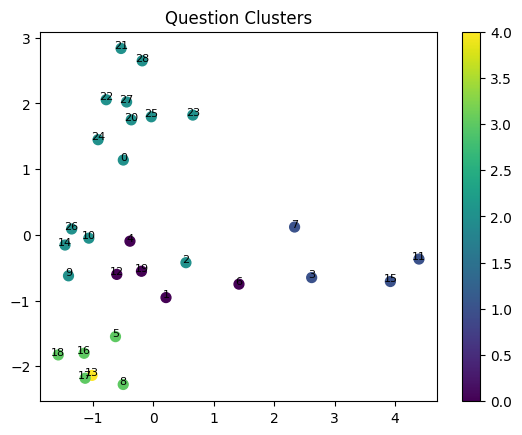

Score = 0.10392691195011139


,question_text,cluster_number
0,I was bothered by things that usually don’t bo...,2
1,I did not feel like eating; my appetite was poor.,0
2,I felt that I could not shake off the blues ev...,2
3,I felt I was just as good as other people.,1
4,I had trouble keeping my mind on what I was do...,0
5,I felt depressed.,3
6,I felt that everything I did was an effort.,0
7,I felt hopeful about the future.,1
8,I thought my life had been a failure.,3
9,I felt fearful.,2


In [24]:
from harmony import cluster_questions
df, score = cluster_questions(match_response.questions, num_clusters = 5, is_show_graph = True)

print (f"Score = {score}")

df

# Display the similarities between instruments

In [25]:
for similarity in match_response.instrument_to_instrument_similarities:
    print (f"F1 similarity of {similarity.instrument_1_name} to {similarity.instrument_2_name}:\t{similarity.f1}")

F1 similarity of CES_D English to GAD-7 Portuguese:	0.675
F1 similarity of CES_D English to GAD-7 Norwegian:	0.55
F1 similarity of GAD-7 Portuguese to GAD-7 Norwegian:	0.6428571428571428
